<a href="https://colab.research.google.com/github/Equipe16-IAA/IAA012-FrameworksIA/blob/main/01_Classificacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### 1. Importação das bibliotecas

In [66]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from tensorflow import keras
from keras.datasets import fashion_mnist

#### 2. Importação dos dados

In [68]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [69]:
print("x_train.shape: ", x_train.shape)
print("y_train.shape: ", y_train.shape)
print("x_test.shape: ", y_test.shape)
print("y_test.shape: ", y_test.shape)

x_train.shape:  (60000, 28, 28)
y_train.shape:  (60000,)
x_test.shape:  (10000,)
y_test.shape:  (10000,)


In [70]:
display(x_train)

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

#### 3. Pré-processamento

In [71]:
x_train, x_test = x_train/255.0, x_test/255.0

#### 4. Criação do modelo

In [72]:
i = tf.keras.layers.Input(shape=(28, 28))
x = tf.keras.layers.Flatten()(i)
x = tf.keras.layers.Dense(128, activation="relu")(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(10, activation="softmax")(x)

model = tf.keras.models.Model(i, x)

#### 5. Compilação e treinamento do modelo

In [73]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [74]:
r = model.fit(x_train,
              y_train,
              validation_data=(x_test, y_test),
              epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7638 - loss: 0.6722 - val_accuracy: 0.8445 - val_loss: 0.4331
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8527 - loss: 0.4095 - val_accuracy: 0.8471 - val_loss: 0.4158
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8628 - loss: 0.3722 - val_accuracy: 0.8623 - val_loss: 0.3811
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8705 - loss: 0.3481 - val_accuracy: 0.8687 - val_loss: 0.3643
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8779 - loss: 0.3315 - val_accuracy: 0.8681 - val_loss: 0.3657
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8848 - loss: 0.3140 - val_accuracy: 0.8717 - val_loss: 0.3483
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8857 - loss: 0.3057 - val_accuracy: 0.8803 - val_loss: 0.3398
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8902 - loss: 0.2998 - 

#### 6. Avaliação do modelo

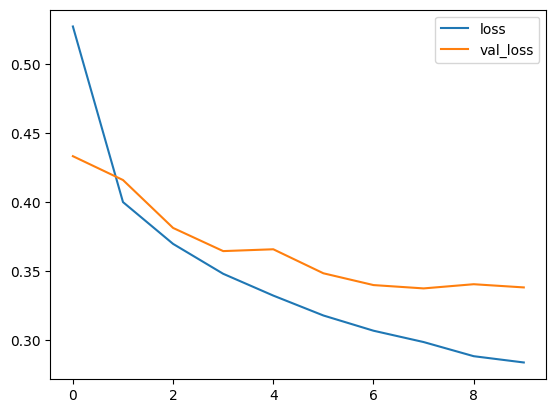

In [75]:
# Plotar a função de perda
plt.plot(r.history["loss"], label="loss")
plt.plot(r.history["val_loss"], label="val_loss")
plt.legend()

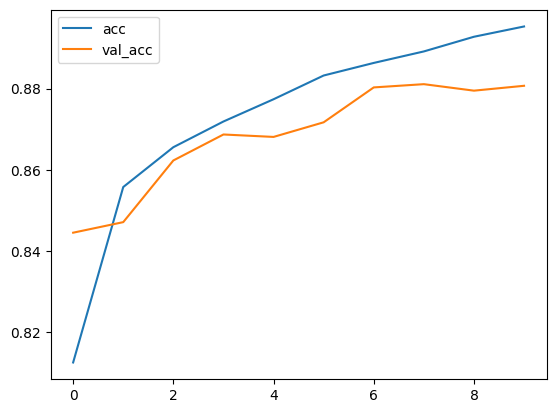

In [76]:
# Plotar a acurácia
plt.plot(r.history["accuracy"], label="acc")
plt.plot(r.history["val_accuracy"], label="val_acc")
plt.legend()

In [77]:
# Avaliar o modelo com a base de teste
print( model.evaluate(x_test, y_test) )

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8806 - loss: 0.3337
[0.3380547761917114, 0.8806999921798706]


#### 7. Predições

In [78]:
y_pred = model.predict(x_test).argmax(axis=1)
print(y_pred)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[9 2 1 ... 8 1 5]


(<Figure size 700x700 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

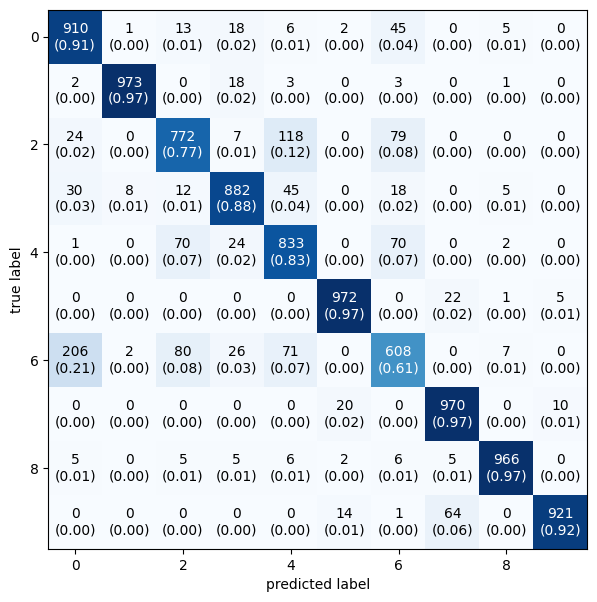

In [79]:
# Matriz de confusão
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(conf_mat=cm, figsize=(7, 7),
                      show_normed=True)

#### 8. Mostrar algumas classificações erradas

In [80]:
misclassified = np.where(y_pred != y_test)[0]

i = np.random.choice(misclassified)

Text(0.5, 1.0, 'True label: 9 Predicted: 5')

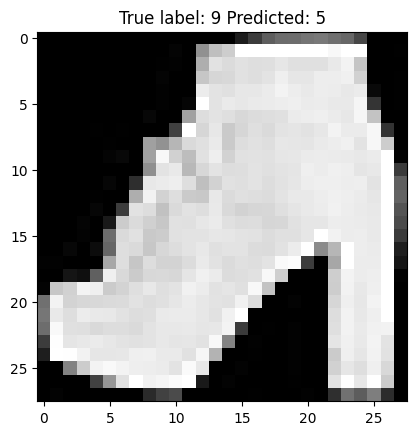

In [81]:
plt.imshow(x_test[i].reshape(28, 28), cmap="gray")
plt.title("True label: %s Predicted: %s" % (y_test[i], y_pred[i]))

Label	-> Description \\
0	->  T-shirt/top \\
1	->	Trouser \\
2	->	Pullover \\
3	->	Dress \\
4	->	Coat \\
5	->	Sandal \\
6	->	Shirt \\
7	->	Sneaker \\
8	->	Bag \\
9	->	Ankle boot \\

---

# Fim do código